# Proyecto 1

<h4 style="color:blue"> Napoleón Cortés Mata</h4>
<h4 style="color:blue"> Erick Cuevas Mora</h4>

### Acciones de Amazon

#### Carga de tabla con los registros de un año

In [116]:
amazon = read.table('AMZN.csv', sep=',', header=TRUE)

#### Visualización de los datos

In [61]:
head(amazon)
max(amazon$Close)
min(amazon$Close)

Date,Open,High,Low,Close,Adj.Close,Volume
2017-01-03,757.92,758.76,747.70,753.67,753.67,3521100
2017-01-04,758.39,759.68,754.20,757.18,757.18,2510500
2017-01-05,761.55,782.40,760.26,780.45,780.45,5830100
2017-01-06,782.36,799.44,778.48,795.99,795.99,5986200
2017-01-09,798.00,801.77,791.77,796.92,796.92,3440100
2017-01-10,796.60,798.00,789.54,795.90,795.90,2558400


[1] 1609.08

[1] 753.67

#### Vector logaritmizado del rendimiento de las acciones Amazon
Obtenemos el logaritmo del cambio porcentual

In [62]:
vector_log_amazon = diff(log(amazon$Close))

In [63]:
head(vector_log_amazon)

[1]  0.004646413  0.030269695  0.019715919  0.001167666 -0.001280696
[6]  0.003912422

In [64]:
print(paste("El número de registros en el año a analizar son: ", length(vector_log_amazon)))

[1] "El número de registros en el año a analizar son:  349"


#### Histograma del vector logaritmizado

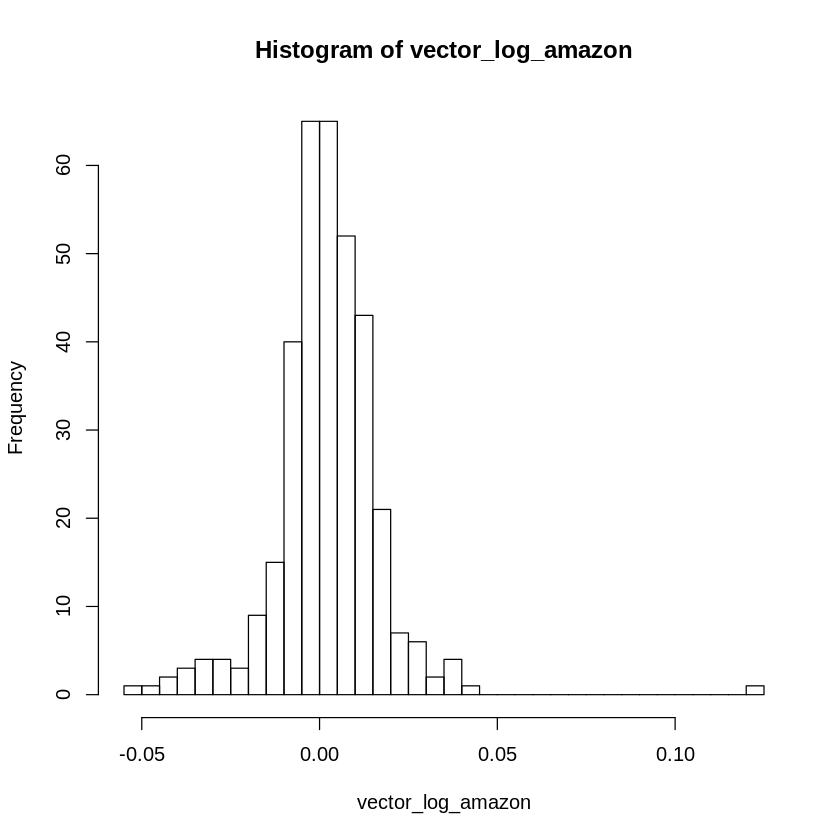

In [65]:
hist(vector_log_amazon, breaks = 50, freq = 1)

In [66]:
print(paste("La fecha del último registro en los datos es: ", gsub('[.]','-',tail(amazon$Date, n = 1))))

[1] "La fecha del último registro en los datos es:  2018-05-23"


<div class="panel panel-info">
    <div class="panel-heading">
    <strong>Definición de parámetros:</strong>
    </div>
    <div class="panel-body">
    $NS = $ número de registros en el vector. [Número de simulaciones].<br>
    $n = $ número de pasos.<br>
    $\sigma = \sqrt{var(vectorLog)}$<br> 
    $\mu = mean(vectorLog) + \frac{(\sigma^2)}{2}$<br>
    $S_{0} =$ valor del registro más reciente. <br>
    $T = $ tiempo.<br>
    $dt = \frac{T}{n}$ - cambio en el tiempo.<br>
    $tiempo = $ secuencia del tiempo en el eje x.
    </div>
</div>

In [104]:
NS = 1500#length(vector_log_amazon)
n = 60#length(vector_log_amazon)
sigma <- sqrt(var(vector_log_amazon))
mu <- mean(vector_log_amazon) + ((sigma^2) / 2)
s0 <- tail(amazon$Close, n = 1)
T = 1
dt = T/n
tiempo = seq(0, T, dt)

In [105]:
dB = sqrt(dt) * matrix(rnorm(NS * n), nrow = NS)
B = apply(dB, 1, cumsum)
B = rbind(0, B)
S <- s0 * exp((mu - (sigma ^ 2) / 2) * tiempo + sigma * B)

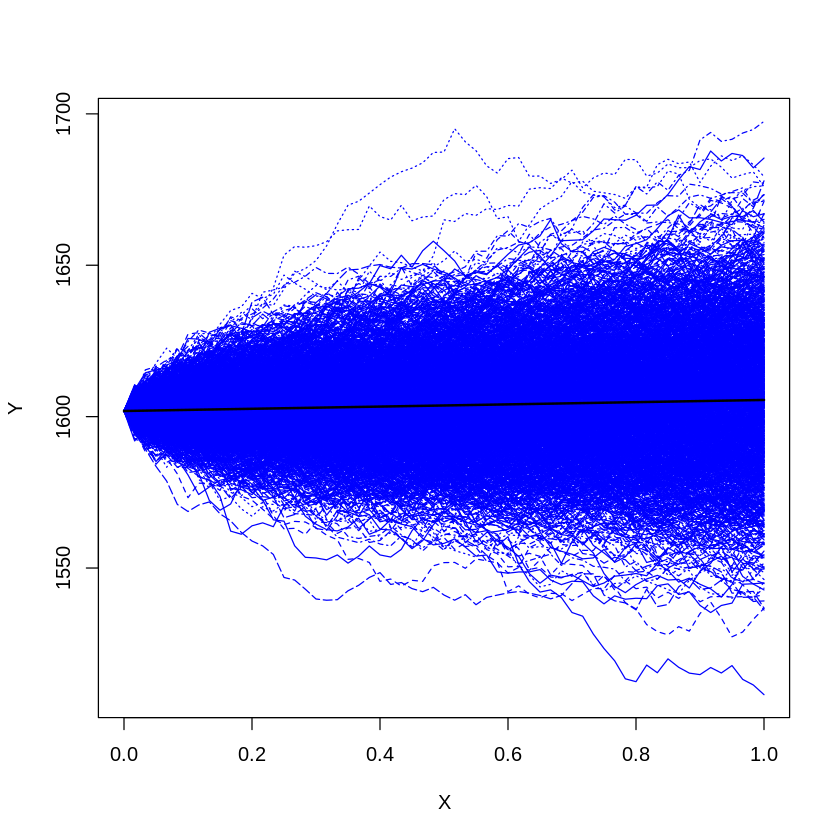

In [106]:
matplot(tiempo, S, col = "blue", t = "l", xlab = "X", ylab = "Y", axes = T)
rango <- range(S)
par(new = T)
curve(s0 * exp(mu * x), ylim = rango, lwd = 2, axes = F, xlab = "", ylab = "")

In [114]:
# Valores mínimo y máximo de la simulación
min(S[n,])
max(S[n,])

[1] 1511.365

[1] 1694.838

<div class="panel panel-danger">
      <div class="panel-heading"><h3>Observaciones</h3></div>
      <div class="panel-body">
    
    Partiendo del último precio en los registros de las acciones de Amazón, se realizan 1500 simulaciones a 60 momentos, tomando en cuenta los parámetros obtenidos. En el plot de arriba tenemos el conjunto de simulaciones y podemos observar que los precios al momento 60 varían entre 1511.36 y 1694.83, aún así, adelante haremos cálculos de probabilidad para analizar qué tan probable es que suba, baje o se mantenga, definiendo puntos de corte.
    <br>
    Dado los valores máximo y mínimo, podemos ver que no hay valores negativos y que el precio de la acción va a la alsa, si bien, con un rendimiento pequeño, al menos es estable y no baja con respecto al último valor observado en los datos originales.
      </div>
    </div>

In [107]:
x <- S[n,] # vector con todos los valores finales de las trayectorias de simulación anterior

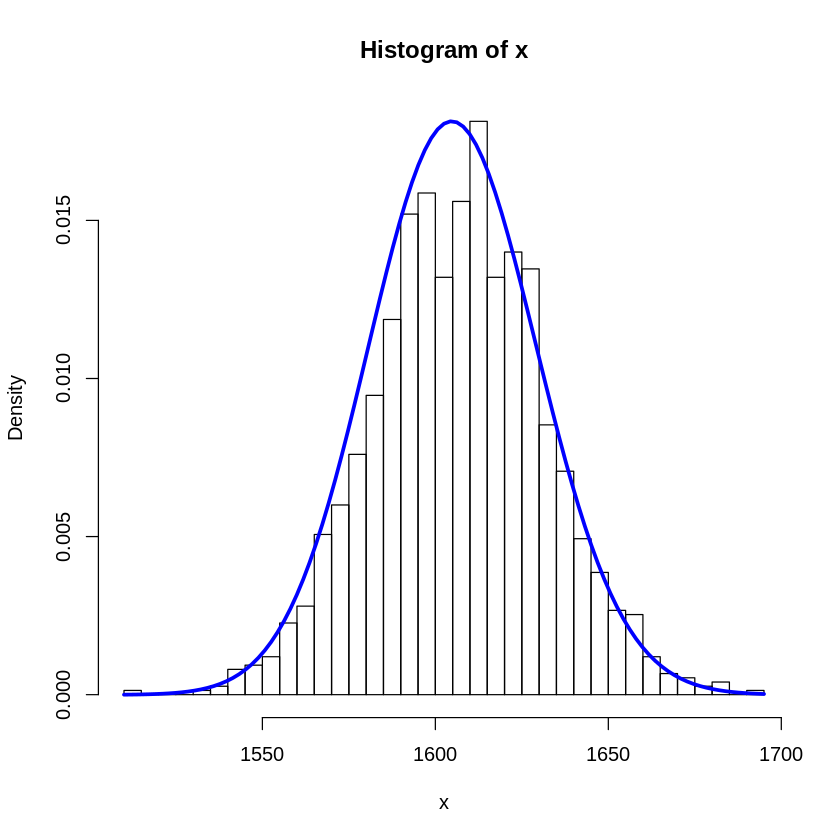

In [108]:
hist(x, breaks = 50, freq = F)
par(new = TRUE)
mi <- min(x)
ma <- max(x)
ml <- log(s0) + mu + (sigma^2)/2
sigl <- sigma
curve(dlnorm(x, ml, sigl), from = mi, to = ma, col = "blue", lwd = 3, axes = F, xlab = '', ylab = '')

<div class="panel panel-danger">
      <div class="panel-heading"><h3>Observaciones</h3></div>
      <div class="panel-body">
    Se genera un histograma con el último momento de las 1500 simulaciones, podemos observar la distribución (normal - lognormal) y analizar en qué punto se concentran los últimos precios simulados.
      </div>
    </div>

### Estimación de probabilidad

<div class="panel panel-primary">
    <div class="panel-heading">
    <strong>$P[S_{t} > a]$</strong>
    </div>
    <div class="panel-body">
De los cortes observados en el histograma, tomamos un valor <strong>'a'</strong> para comparar, obtenemos el número de simulaciones mayores a <strong>'a'</strong> entre el número de simulaciones, para obtener la <strong>probabilidad</strong> de que para el siguiente año, las acciones amazon <strong>tengan un precio mayor a $1,601 USD</strong>. Se realiza también el cálculo exacto para comparar resultados.
    </div>
</div>

In [121]:
a <- 1601
length(x[x > a])/NS
1-plnorm(a, ml, sigl)

[1] 0.5886667

[1] 0.5771717

<div class="panel panel-primary">
    <div class="panel-heading">
    <strong>$P[S_{t} < b]$</strong>
    </div>
    <div class="panel-body">
Ahora definimos un valor <strong>'b'</strong>, calculando el número de simulaciones menores a <strong>'b'</strong> entre el total de simulaciones, obtenemos la <strong>probabilidad</strong> de que para el siguiente año, las acciones amazon <strong>tengan un precio menor a $1,601 USD</strong>. Se realiza también el cálculo exacto para comparar resultados.
    </div>
</div>

In [120]:
b <- 1601
(w <- length(x[x < b])/NS)
plnorm(b, ml, sigl)

[1] 0.4113333

[1] 0.4228283

<div class="panel panel-primary">
    <div class="panel-heading">
    <strong>$P[a < S_{t} < b]$</strong>
    </div>
    <div class="panel-body">
Dados los valores <strong>'a'</strong> y <strong>'b'</strong>, calculando el número de simulaciones entre <strong>'a'</strong> y <strong>'b'</strong> entre el total de simulaciones, obtenemos la <strong>probabilidad</strong> de que para el siguiente año, las acciones amazon <strong>tengan un precio entre 1,600 y 1,650 USD</strong>. Se realiza también el cálculo exacto para comparar resultados.
    </div>
</div>

In [122]:
a <- 1601
b <- 1651
length(x[a < x & x < b])/NS
plnorm(b, ml, sigl) - plnorm(a, ml, sigl)

[1] 0.548

[1] 0.5452669

In [119]:
tail(amazon$Close, n = 1)

[1] 1601.86

<div class="panel panel-danger">
      <div class="panel-heading"><h3>Conclusiones</h3></div>
      <div class="panel-body">
    
    Analizando los cambios en el precio, podemos ver que el precio de una acción de Amazon, es muy estable.<br>
    Nuestro último costo registrado fue 1,601.85, con base en esto calculamos las probabilidades anteriores y observamos que:
    <ul>
        <li>La probabilidad de que las acciones suban dentro de 60 días, es 0.58. </li>
        <li>La probabilidad de que las acciones bajen dentro de 60 días, es 0.41. </li>
        <li>La probabilidad de que las acciones aumenten de 1 a 50 USD en 60 días, es 0.54. </li>
    </ul>
      </div>
    </div>